<a   href="https://colab.research.google.com/github/eduardojdiniz/Buzznauts/blob/master/scripts/demo_CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo VideoDataFrame Class 
This demo uses the Algonauts dataset.
    
TABLE OF CODE CONTENTS:
1. Minimal demo without image transforms
2. Minimal demo without sparse temporal sampling for single continuous frame clips, without image transforms
3. Demo with image transforms
4. Demo with image transforms and dataloader

For more details about the VideoDataFrame Class, see the [VideoDataset Repo](https://video-dataset-loading-pytorch.readthedocs.io/en/latest/VideoDataset.html)

### Setup 

In [1]:
# Download Buzznauts
!pip install duecredit --quiet
!pip install git+https://github.com/eduardojdiniz/Buzznauts --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load Buzznauts data functions
!pip install decord --quiet
!pip install nilearn
from Buzznauts.data.utils import plot_video_frames
from Buzznauts.data.videodataframe import VideoFrameDataset, ImglistToTensor

     |████████████████████████████████| 4.9 MB 39.5 MB/s 


In [5]:
# Import pytorch
from torchvision import transforms
import torch

In [6]:
# Set videos and annotation file path
import os.path as op
stimuli = "/content/drive/MyDrive/Buzznauts/data/stimuli"
videos_root = op.join(stimuli, "frames")
annotation_file = op.join(videos_root, "annotations.txt")

In [15]:
def denormalize(video_tensor):
    """Undoes mean/standard deviation normalization, zero to one scaling, and channel rearrangement for a batch of images.
    
    Parameters
    ----------
    video_tensor : tensor.FloatTensor 
        A (FRAMES x CHANNELS x HEIGHT x WIDTH) tensor
        
    Returns
    ----------
    video_array : numpy.ndarray[float]
        A (FRAMES x CHANNELS x HEIGHT x WIDTH) numpy array of floats
    """
    inverse_normalize = transforms.Normalize(
        mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
        std=[1 / 0.229, 1 / 0.224, 1 / 0.225])
    return (inverse_normalize(video_tensor) * 255.).type(torch.uint8).permute(0, 2, 3, 1).numpy()

### Cross Validation Example

0547_flickr-4-3-3-9-2-5-8-9-5943392589_2


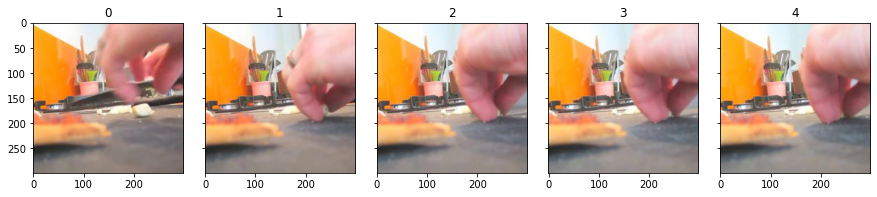

0734_flickr-6-9-2-8-4-2-2-7-6669284227_51


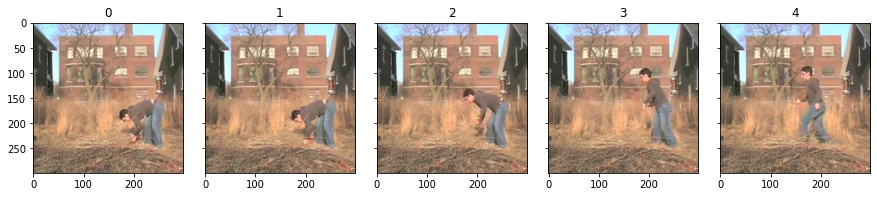

0208_bing-www_facebook_com_sewwhatalicia_videos_1148889631878967__612


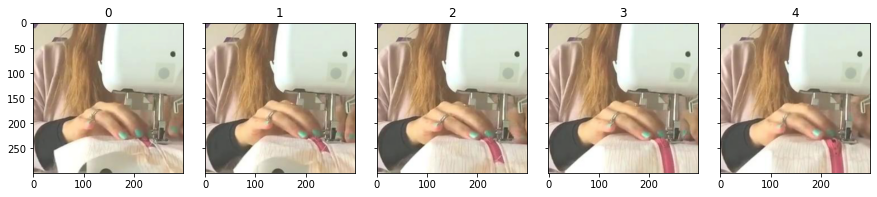

0844_flickr-8-0-9-3-5-9-3-4-3380935934_25


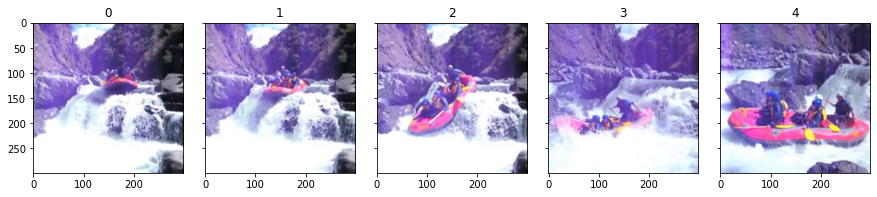

0487_flickr-3-6-7-6-1-2-9-0-16436761290_7


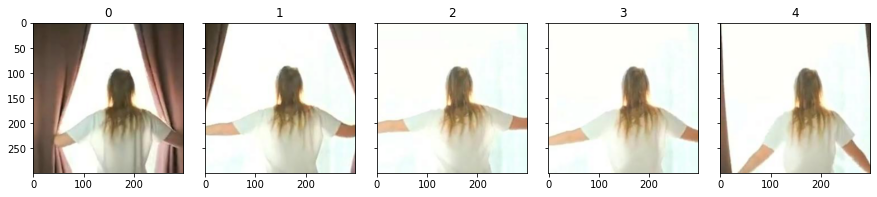

In [16]:
preprocess = transforms.Compose([
    ImglistToTensor(),  # list of PIL images to (FRAMES x CHANNELS x HEIGHT x WIDTH) tensor
    transforms.Resize(299),  # image batch, resize smaller edge to 299
    transforms.CenterCrop(299),  # image batch, center crop to square 299x299
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Get the 1000 training examples
annotation_file_train = op.join(videos_root, "annotations_train.txt") 

dataset = VideoFrameDataset(
    root_path=videos_root,
    annotationfile_path=annotation_file_train,
    num_segments=5,
    frames_per_segment=1,
    imagefile_template='img_{:05d}.jpg',
    transform=preprocess,
    random_shift=True,
    test_mode=False
)

from torch.utils.data import random_split
CV = 5
epochs = 1 
n_samples = 10
train_len = 100
val_len = len(dataset) - train_len

for cv in range(CV):

  train_dataset , val_dataset = random_split(dataset, [train_len, val_len])
  val_dataset.dataset.test_mode = True

  for epoch in range(10):
      for video_batch, labels in train_dataset:
          """
          Insert Training Code Here
          """
          print(labels)
          frames = denormalize(video_batch)
          plot_video_frames(rows=1, cols=5, frame_list=frames, plot_width=15., plot_height=3.)

          break
      break